In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pykitti

In [6]:
np.set_printoptions(suppress=True, precision=6)
np.set_printoptions(edgeitems=30, linewidth=120)
basedir, date, drive, frame, min_dist = '../datasets/KITTI_SAMPLE_RAW/KITTI_SAMPLE/RAW', '2011_09_26', '0009', 0, 5
dataset = pykitti.raw(basedir, date, drive, frames=range(0, 5, 1))

print([item for item in dir(dataset.calib) if not item.startswith('_')])

['K_cam0', 'K_cam1', 'K_cam2', 'K_cam3', 'P_rect_00', 'P_rect_10', 'P_rect_20', 'P_rect_30', 'R_rect_00', 'R_rect_10', 'R_rect_20', 'R_rect_30', 'T_cam0_imu', 'T_cam0_velo', 'T_cam0_velo_unrect', 'T_cam1_imu', 'T_cam1_velo', 'T_cam2_imu', 'T_cam2_velo', 'T_cam3_imu', 'T_cam3_velo', 'T_velo_imu', 'b_gray', 'b_rgb', 'count', 'index']


In [50]:
points_cloud = dataset.get_velo(0)
points_cloud[:, -1] = 1
image = dataset.get_cam2(0)
T = dataset.calib.T_cam2_velo
K_cam2 = dataset.calib.K_cam2

In [48]:
T

array([[ 0.000235, -0.999944, -0.010563,  0.059372],
       [ 0.010449,  0.010565, -0.99989 , -0.075109],
       [ 0.999945,  0.000124,  0.010451, -0.272133],
       [ 0.      ,  0.      ,  0.      ,  1.      ]])

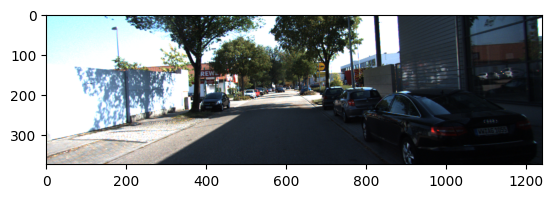

In [47]:
plt.imshow(image)

In [55]:
K = np.identity(4)
K[0:-1, 0:-1] = K_cam2
K

array([[721.5377,   0.    , 609.5593,   0.    ],
       [  0.    , 721.5377, 172.854 ,   0.    ],
       [  0.    ,   0.    ,   1.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   1.    ]])

In [57]:
P = K @ T

In [77]:
ind = np.argwhere(points_cloud[:, 0] >= 5)

In [83]:
new_points = points_cloud[ind]

In [89]:
new_points.T.shape

(4, 1, 27611)

In [ ]:
pts_2D.T[:, 0]

array([[40176.418724, 11292.683693,    73.460975,     1.      ],
       [39846.018124, 11247.169493,    73.163926,     1.      ],
       [39723.483658, 11236.453191,    73.091916,     1.      ],
       [31340.826969,  8858.453881,    57.897203,     1.      ],
       [30640.539934,  8694.128913,    56.842907,     1.      ],
       [29560.731236,  8417.315886,    55.072387,     1.      ],
       [29405.777299,  8410.494085,    55.019389,     1.      ],
       [29328.900418,  8425.993882,    55.11345 ,     1.      ],
       [28889.237975,  8333.901236,    54.522298,     1.      ],
       [28825.862687,  8334.385359,    54.521306,     1.      ],
       [28721.11382 ,  8341.529944,    54.561348,     1.      ],
       [28559.900646,  8331.972081,    54.49335 ,     1.      ],
       [22593.004566,  6575.796148,    43.284833,     1.      ],
       [22600.167416,  6608.639978,    43.491927,     1.      ],
       [22422.644022,  6585.746316,    43.343906,     1.      ],
       [28601.962741,  85

In [151]:
new_points.T.shape

(4, 1, 27611)

In [168]:
pts_2D = P @ new_points.T.squeeze()
pts_2D[0] /= pts_2D[2]
pts_2D[1] /= pts_2D[2]
pts_2D[2] /= pts_2D[2]

In [169]:
pts_2D

array([[546.908325, 544.612905, 543.47301 , 541.3185  , 539.038929, 536.761393, 534.462085, 532.15504 , 529.860973,
        528.708222, 526.400374, 524.09882 , 521.961223, 519.640518, 517.319418, 514.823662, 513.647614, 511.534609,
        509.250251, 506.705632, 504.597944, 502.053614, 499.720702, 498.756445, 496.418912, 494.085725, 491.736377,
        489.401788, 487.052777, 484.670274, ..., 663.005457, 660.502613, 658.026661, 656.857476, 654.516331,
        652.170509, 649.630209, 647.359325, 644.839402, 642.441985, 641.231562, 638.827425, 636.419741, 634.045383,
        631.570108, 629.282465, 626.811712, 625.636035, 623.231228, 711.553709, 709.202023, 706.85692 , 696.266673,
        693.872659, 691.577461, 760.479544, 759.295056, 756.843439, 754.391065, 751.98755 ],
       [153.723575, 153.725615, 153.730451, 153.003141, 152.950109, 152.840949, 152.864186, 152.884528, 152.85308 ,
        152.864742, 152.883503, 152.898877, 151.919174, 151.950958, 151.941691, 153.020941, 153.158798

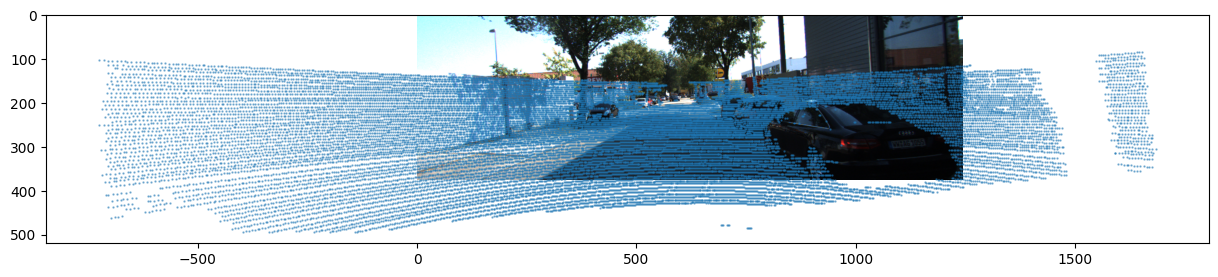

In [170]:
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.scatter(pts_2D[0], pts_2D[1], s=0.5, alpha=0.5)

In [166]:
img_shape = (1242, 375)

27611

In [ ]:
mask = (pts_2D[0])

In [187]:
ind1 = np.argwhere((pts_2D[0, :] > 0) & (pts_2D[0, :] < img_shape[0]) & (pts_2D[1, :] > 0) & (pts_2D[1, :] < img_shape[1]))

In [198]:
processed_pts_2D = pts_2D[:, ind1]

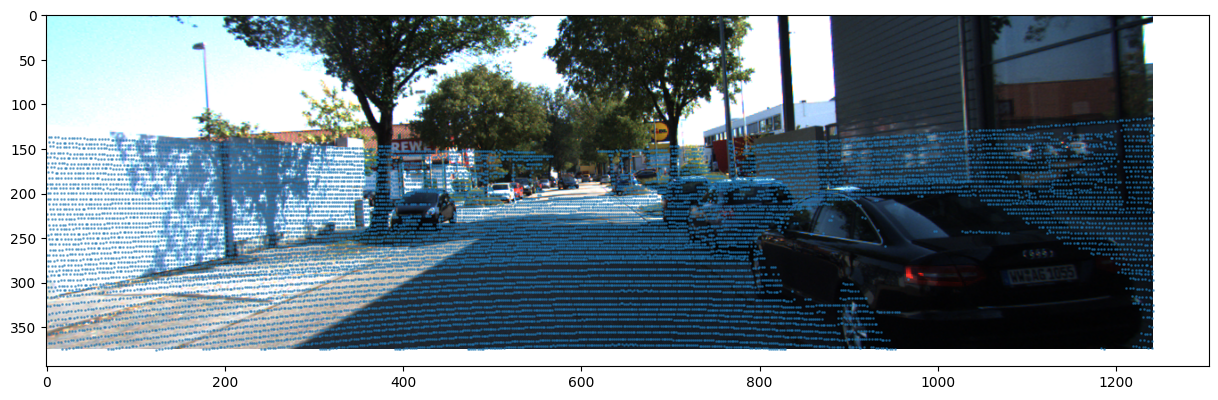

In [200]:
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.scatter(processed_pts_2D[0], processed_pts_2D[1], s=1.0, alpha=0.5)

In [206]:
print(ind.squeeze())
ind_3D = ind.squeeze()[ind1]

[     0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16
     17     18     19     20     21     22     23     24     25     26     27     28     29 ... 107697 107698 107699
 107700 107701 107702 107703 107704 107705 107706 107707 107708 107709 107710 107711 107712 107713 107714 107715 115837
 115838 115839 115840 115841 115842 117276 117277 117278 117279 117280]


In [210]:
points_cloud

array([[73.708,  6.427,  2.711,  1.   ],
       [73.411,  6.634,  2.702,  1.   ],
       [73.339,  6.743,  2.7  ,  1.   ],
       [58.149,  5.526,  2.184,  1.   ],
       [57.095,  5.606,  2.149,  1.   ],
       [55.325,  5.607,  2.09 ,  1.   ],
       [55.272,  5.777,  2.088,  1.   ],
       [55.366,  5.963,  2.092,  1.   ],
       [54.775,  6.073,  2.073,  1.   ],
       [54.774,  6.16 ,  2.073,  1.   ],
       [54.814,  6.339,  2.075,  1.   ],
       [54.746,  6.505,  2.073,  1.   ],
       [43.541,  5.307,  1.692,  1.   ],
       [43.748,  5.472,  1.7  ,  1.   ],
       [43.6  ,  5.593,  1.696,  1.   ],
       [55.809,  7.345,  2.113,  1.   ],
       [57.792,  7.699,  2.181,  1.   ],
       [43.169,  5.882,  1.682,  1.   ],
       [40.723,  5.678,  1.599,  1.   ],
       [56.047,  8.004,  2.124,  1.   ],
       [40.586,  5.919,  1.596,  1.   ],
       [56.277,  8.398,  2.133,  1.   ],
       [56.23 ,  8.572,  2.132,  1.   ],
       [41.371,  6.366,  1.625,  1.   ],
       [41.274, 

In [211]:
depth = points_cloud[ind_3D, 2]

In [212]:
depth

array([[ 2.711],
       [ 2.702],
       [ 2.7  ],
       [ 2.184],
       [ 2.149],
       [ 2.09 ],
       [ 2.088],
       [ 2.092],
       [ 2.073],
       [ 2.073],
       [ 2.075],
       [ 2.073],
       [ 1.692],
       [ 1.7  ],
       [ 1.696],
       [ 2.113],
       [ 2.181],
       [ 1.682],
       [ 1.599],
       [ 2.124],
       [ 1.596],
       [ 2.133],
       [ 2.132],
       [ 1.625],
       [ 1.622],
       [ 1.621],
       [ 1.62 ],
       [ 1.61 ],
       [ 1.618],
       [ 1.687],
       ...,
       [-1.689],
       [-1.686],
       [-1.689],
       [-1.686],
       [-1.684],
       [-1.687],
       [-1.686],
       [-1.686],
       [-1.69 ],
       [-1.687],
       [-1.685],
       [-1.689],
       [-1.686],
       [-1.686],
       [-1.688],
       [-1.688],
       [-1.689],
       [-1.686],
       [-1.684],
       [-1.686],
       [-1.693],
       [-1.686],
       [-1.686],
       [-1.686],
       [-1.685],
       [-1.688],
       [-1.691],
       [-1.687],
  

In [215]:
depth.shape

(16362, 1)

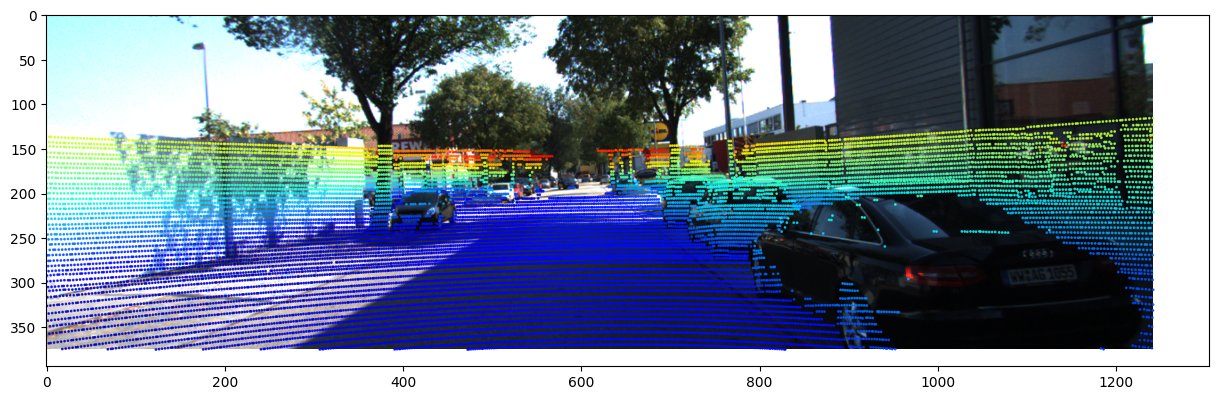

In [222]:
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.scatter(processed_pts_2D[0], processed_pts_2D[1], s=1.0, alpha=0.8, c=depth.squeeze(), cmap='jet')